# Reporte de práctica 7: Regresión múltiple con statsmodels

En ésta práctica es parecida a la anterior, solo que ahora los modelos lineales tendrán mas de un factor.

## Objetivo 
Incluir por lo menos un modelo de regresión múltiple e intenta usar sus resultados como un clasificador de alguna variable de interés para el proyecto.

## Cargar datos de csv

Queremos probar si la categoría eligieron para su clip, está relacionado de alguna forma con el país de procedencia y por año de participación.

Primero importamos el archivo que esta en github que tiene información limpia de prácticas pasadas.

In [6]:
import statsmodels.api as sm
from numpy import isnan
import pandas as pd

cine = pd.read_csv('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/cineWoNAN.csv')
#print(cine)
n=len(cine)

## Categorizaciones


Como tenemos muchas cadenas de texto en nuestros datos, es importante hacer categorizaciones ya que hacemos conteos de la información que tenemos disponible y así poder hacer cálculos estadísticos.

### Categorias por país


Aplicamos una categorización por país, pero se removieron los datos que involucran a México y Colombia que son los países anfitriones del concurso y por ende son los que nos sesgan la información, entonces esta información será relevante a los países extranjeros que participan.

In [27]:
paises = cine['País'].unique()

listaPaises = []
for country in paises:
    listaPaises.append([country,cine[(cine['País']==country) & (cine['Año']==2015)].count()['Año'],cine[(cine['País']==country) & (cine['Año']==2016)].count()['Año'],cine[(cine['País']==country) & (cine['Año']==2017)].count()['Año'],cine[(cine['País']==country) & (cine['Año']==2018)].count()['Año'],cine[cine['País']==country].count()['Año']])
#print(listaPaises)
#listaPaises.pop(0)## quita Colombia
#listaPaises.pop(1)## quita México

dfpais = pd.DataFrame(data=listaPaises)
dfpais.columns = ['Pais', '2015', '2016', '2017', '2018', 'Total']
print(dfpais)

                    Pais  2015  2016  2017  2018  Total
0               Colombia   276   837   614   357   2084
1                 España     7     8     1     5     21
2                 México     5     2     1    89     97
3                Ecuador     2     3     0     0      5
4                Francia     2     1     0     0      3
5              Venezuela     3     1     1     0      5
6              Argentina     1     3     3     1      8
7                   Perú     1     0     0     0      1
8         Estados Unidos     3     3     3     2     11
9                 Brasil     2     1     0     0      3
10                  Cuba     1     0     0     0      1
11              Alemania     0     1     0     0      1
12         Internacional     0     5    11     0     16
13             Marruecos     0     1     0     0      1
14               Uruguay     0     1     0     0      1
15  Republica Dominicana     0     1     0     0      1
16                Canadá     0     1     0     0

### Categorias por "Categoría"

También categorizamos la Categoría del corto, y se clasificó por año.

In [28]:
categorias = cine['Categoría'].unique()
listaCategoria = []
for cat in categorias:
    listaCategoria.append([cat,cine[(cine['Categoría']==cat) & (cine['Año']==2015) & (cine['País']!='Colombia')& (cine['País']!='México')].count()['Año'],cine[(cine['Categoría']==cat) & (cine['Año']==2016)& (cine['País']!='Colombia')& (cine['País']!='México')].count()['Año'],cine[(cine['Categoría']==cat) & (cine['Año']==2017)& (cine['País']!='Colombia')& (cine['País']!='México')].count()['Año'],cine[(cine['Categoría']==cat) & (cine['Año']==2018)& (cine['País']!='Colombia')& (cine['País']!='México')].count()['Año'],cine[(cine['Categoría']==cat) & (cine['País']!='Colombia')& (cine['País']!='México')].count()['Año']])

dfcat = pd.DataFrame(data=listaCategoria)
dfcat.columns = ['Categoria', '2015', '2016', '2017', '2018', 'Total']
print(dfcat)

     Categoria  2015  2016  2017  2018  Total
0   Aficionado    13    16    11     3     43
1  Profesional     8     7     7     3     25
2     Infantil     1     1     0     0      2
3      Juvenil     0     4     9     0     13
4      SmarTIC     0     2     9     2     13


### Categorias por Género

También categorizamos género del corto, y se clasificó por año.

In [16]:
#generos = cine['Género'].unique()
#print(generos)
#listaGenero = []
#for gen in generos:
#    listaGenero.append([gen,cine[(cine['Género']==gen) & (cine['Año']==2015) ].count()['Año'],cine[(cine['Género']==gen) & (cine['Año']==2016)].count()['Año'],cine[(cine['Género']==gen) & (cine['Año']==2017)].count()['Año'],cine[(cine['Género']==gen) & (cine['Año']==2018)].count()['Año'],cine[(cine['Género']==gen)].count()['Año']])

#dfgen = pd.DataFrame(data=listaGenero)
#dfgen.columns = ['Género', '2015', '2016', '2017', '2018', 'Total']
#print(dfgen)

In [25]:
if n >= 8: # no se puede con menos de ocho
        y = dfpais["Total"]
        x = dfpais[["2015", "2016", "2017", "2018"]]
        x = sm.add_constant(x) # para contar con la b en nuestra f()
        m = sm.OLS(y, x).fit() 
        #print(datos.profe.unique()[0])
        print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.196e+30
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          2.59e-181
Time:                        11:21:47   Log-Likelihood:                 536.45
No. Observations:                  17   AIC:                            -1063.
Df Residuals:                      12   BIC:                            -1059.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.992e-16   2.35e-15     -0.426      0.6

/home/samataroukami/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


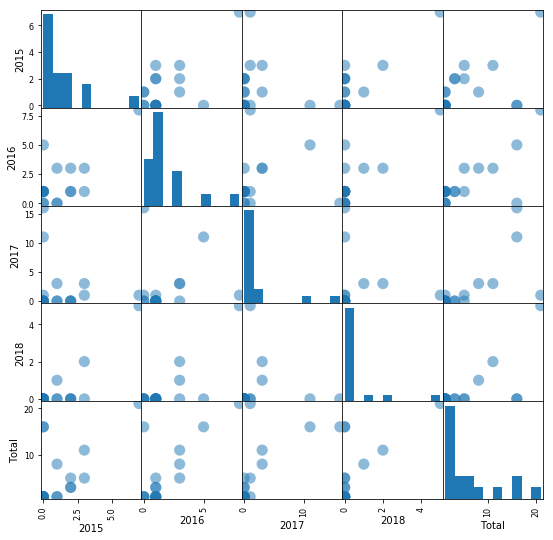

In [26]:
import matplotlib.pyplot as plt
tmp = pd.plotting.scatter_matrix(dfpais, figsize = (9, 9), s = 500) 

Haremos lo mismo con las categorías, pero no espero obtener nada ya que la cantidad de registros es menor a ocho.

In [29]:
if n >= 8: # no se puede con menos de ocho
        y = dfcat["Total"]
        x = dfcat[["2015", "2016", "2017", "2018"]]
        x = sm.add_constant(x) # para contar con la b en nuestra f()
        m = sm.OLS(y, x).fit() 
        #print(datos.profe.unique()[0])
        print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 25 Mar 2019   Prob (F-statistic):                nan
Time:                        11:38:44   Log-Likelihood:                 153.74
No. Observations:                   5   AIC:                            -297.5
Df Residuals:                       0   BIC:                            -299.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.155e-14        inf         -0        n

/home/samataroukami/.local/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/home/samataroukami/.local/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1549: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/samataroukami/.local/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/home/samataroukami/.local/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/home/samataroukami/.local/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return

No funcionó por que tengo menos de 8 categorias.

           2015      2016      2017      2018     Total
2015   1.000000  0.999679  0.998901  0.972890  0.999269
2016   0.999679  1.000000  0.999529  0.969860  0.999011
2017   0.998901  0.999529  1.000000  0.968822  0.998677
2018   0.972890  0.969860  0.968822  1.000000  0.979544
Total  0.999269  0.999011  0.998677  0.979544  1.000000


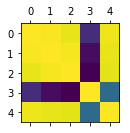

In [31]:
print(dfpais.corr())
f = plt.figure()  
sf = f.add_subplot(212)
tmp = sf.matshow(dfpais.corr())

### Observación
Entonces descubrí que la mejor manera de tratar los datos es reemplazando la categorización en el dataframe original, es decir, cambiar texto por numeros que indican el país o la categoría.

## Conclusión

Esta práctica no la concluí a tiempo, tendré que realizarla completa y cumplir con los objetivos para poder agregarla al portafolio al final del semestre.

--25 de Marzo 2019-- Luis Angel Gutierrez Rodriguez 1484412